In [ ]:
from google.colab import files
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score,f1_score,roc_auc_score

In [ ]:
uploaded= files.upload()


Saving heart_disease_uci.csv to heart_disease_uci.csv


In [ ]:
df = pd.read_csv('heart_disease_uci.csv')

In [ ]:
df.drop(columns=['id'], errors='ignore')


,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0


In [ ]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

# Impute numeric columns with mean
imputer_numeric = SimpleImputer(strategy='mean')
data_numeric_imputed = pd.DataFrame(imputer_numeric.fit_transform(df[numeric_cols]), columns=numeric_cols)

# Impute categorical columns with the most frequent value (mode)
imputer_categorical = SimpleImputer(strategy='most_frequent')
data_categorical_imputed = pd.DataFrame(imputer_categorical.fit_transform(df[categorical_cols]), columns=categorical_cols)

# Combine the numeric and categorical data
data_imputed = pd.concat([data_numeric_imputed, data_categorical_imputed], axis=1)

# Optional: Encode categorical data
data_imputed = pd.get_dummies(data_imputed, columns=categorical_cols)

In [ ]:
X = data_imputed.drop(columns='num')
y = data_imputed['num']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

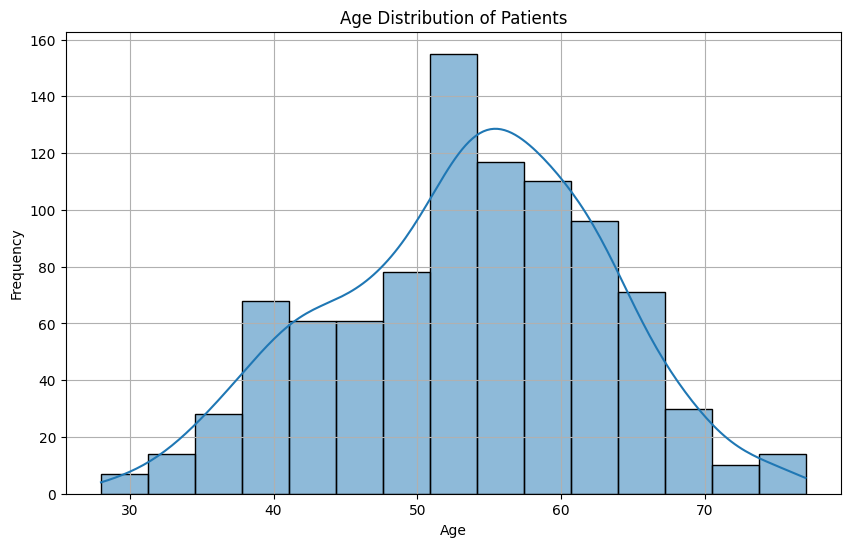

In [ ]:
# Plot Age Distribution Histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=15, kde=True)
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

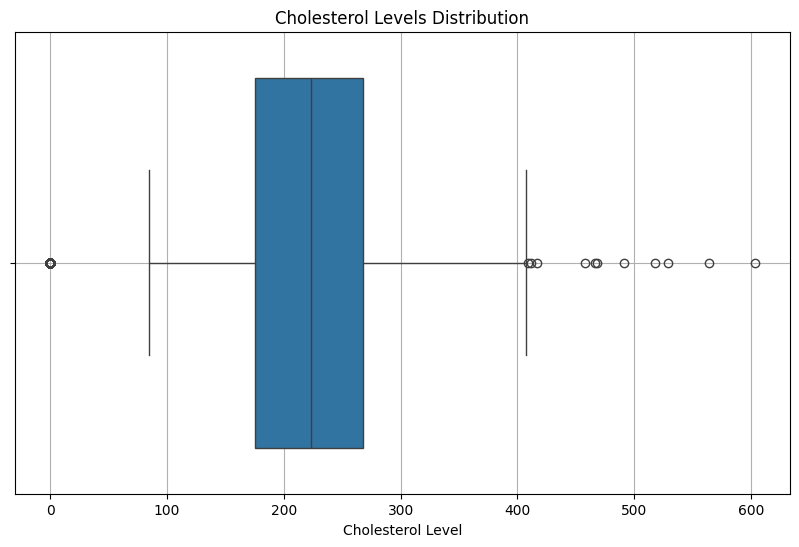

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['chol'])
plt.title('Cholesterol Levels Distribution')
plt.xlabel('Cholesterol Level')
plt.grid(True)
plt.show()

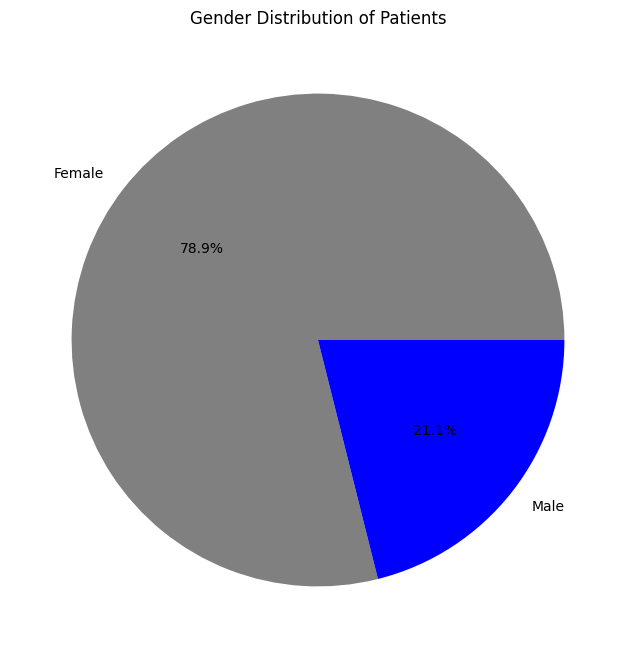

In [ ]:
gender_counts = df['sex'].value_counts()
labels = ['Female', 'Male']
sizes = gender_counts.values

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['grey', 'blue'])
plt.title('Gender Distribution of Patients')
plt.show()

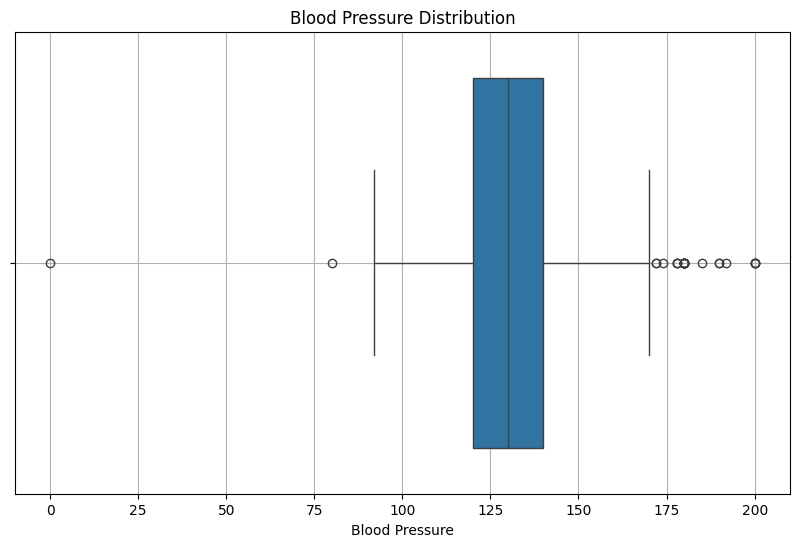

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['trestbps'])
plt.title('Blood Pressure Distribution')
plt.xlabel('Blood Pressure')
plt.grid(True)
plt.show()

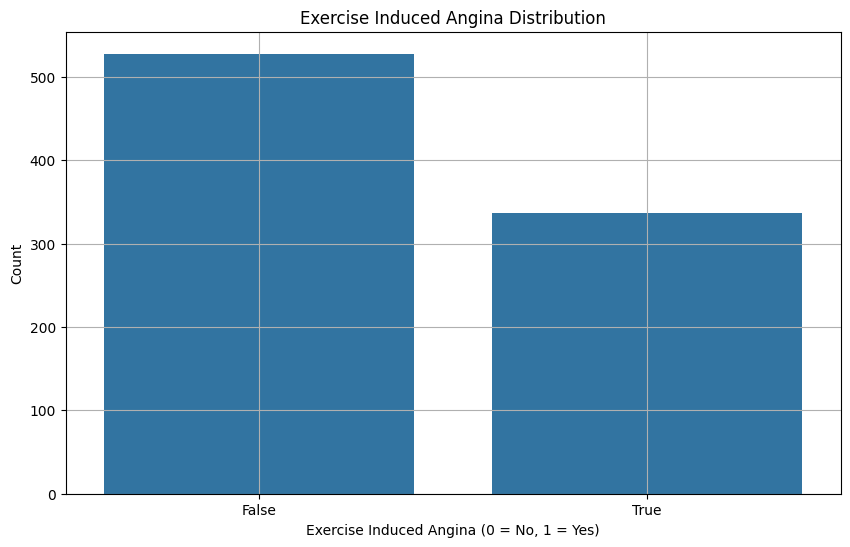

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='exang', data=df)
plt.title('Exercise Induced Angina Distribution')
plt.xlabel('Exercise Induced Angina (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.grid(True)
plt.show()

<ipython-input-13-088d3a3edcfc>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=sizes, palette='pastel')


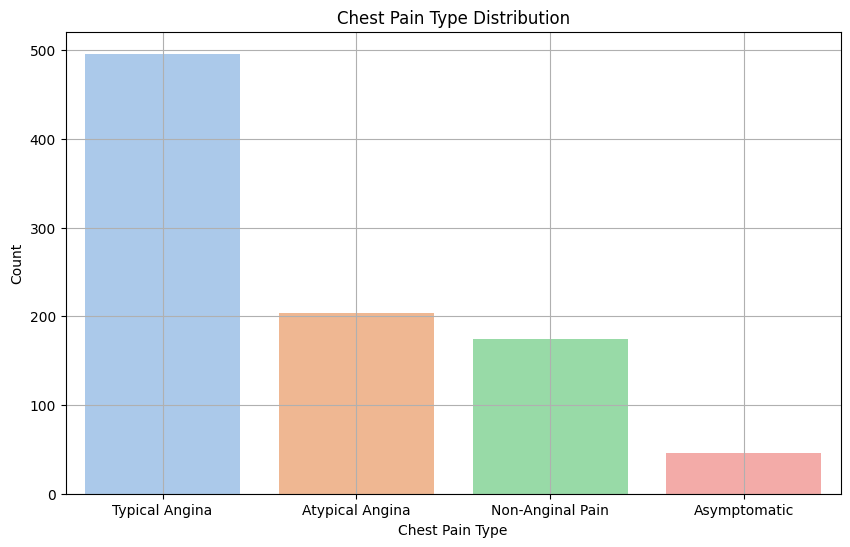

In [ ]:
chest_pain_counts = df['cp'].value_counts()
labels = ['Typical Angina', 'Atypical Angina', 'Non-Anginal Pain', 'Asymptomatic']
sizes = chest_pain_counts.values

plt.figure(figsize=(10, 6))
sns.barplot(x=labels, y=sizes, palette='pastel')
plt.title('Chest Pain Type Distribution')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.grid(True)
plt.show()

<ipython-input-14-b7be13761010>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='fbs', data=df, palette='coolwarm')


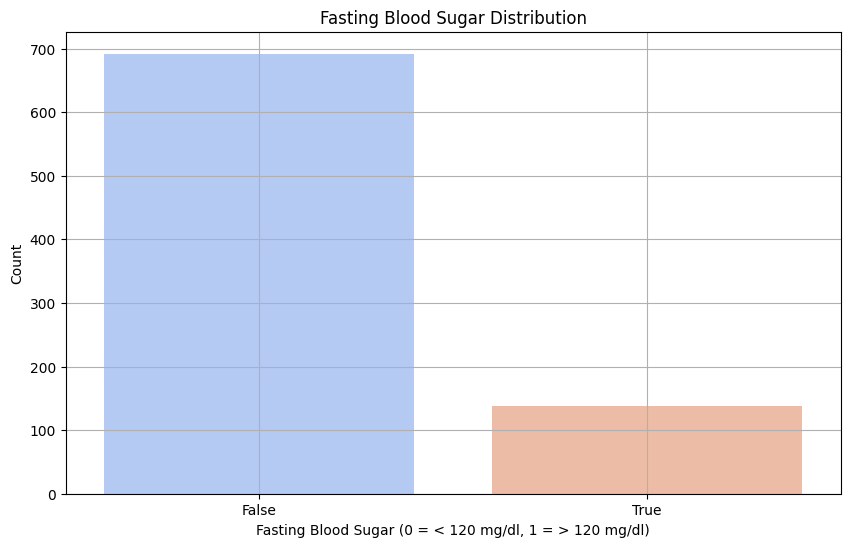

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='fbs', data=df, palette='coolwarm')
plt.title('Fasting Blood Sugar Distribution')
plt.xlabel('Fasting Blood Sugar (0 = < 120 mg/dl, 1 = > 120 mg/dl)')
plt.ylabel('Count')
plt.grid(True)
plt.show()

<ipython-input-19-6f63532a2ec8>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Heart Disease Severity', y='Mean Max Heart Rate', data=mean_thalach, palette='Set2')


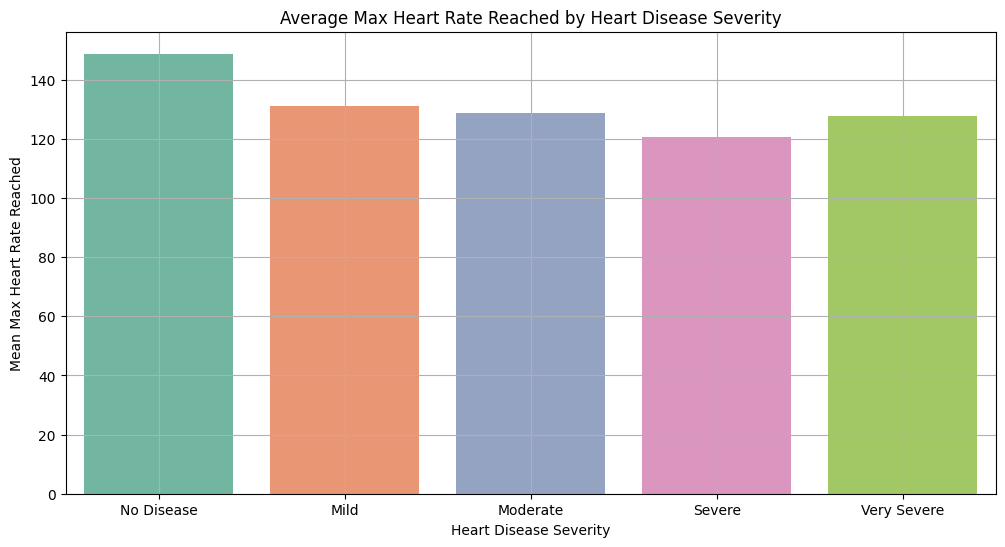

In [ ]:
mean_thalach = df.groupby('num')['thalch'].mean().reset_index()
mean_thalach.columns = ['Heart Disease Severity', 'Mean Max Heart Rate']

# Bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Heart Disease Severity', y='Mean Max Heart Rate', data=mean_thalach, palette='Set2')
plt.title('Average Max Heart Rate Reached by Heart Disease Severity')
plt.xlabel('Heart Disease Severity')
plt.ylabel('Mean Max Heart Rate Reached')
plt.xticks(ticks=[0, 1, 2, 3, 4], labels=['No Disease', 'Mild', 'Moderate', 'Severe', 'Very Severe'])
plt.grid(True)
plt.show()

In [ ]:
df.columns

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

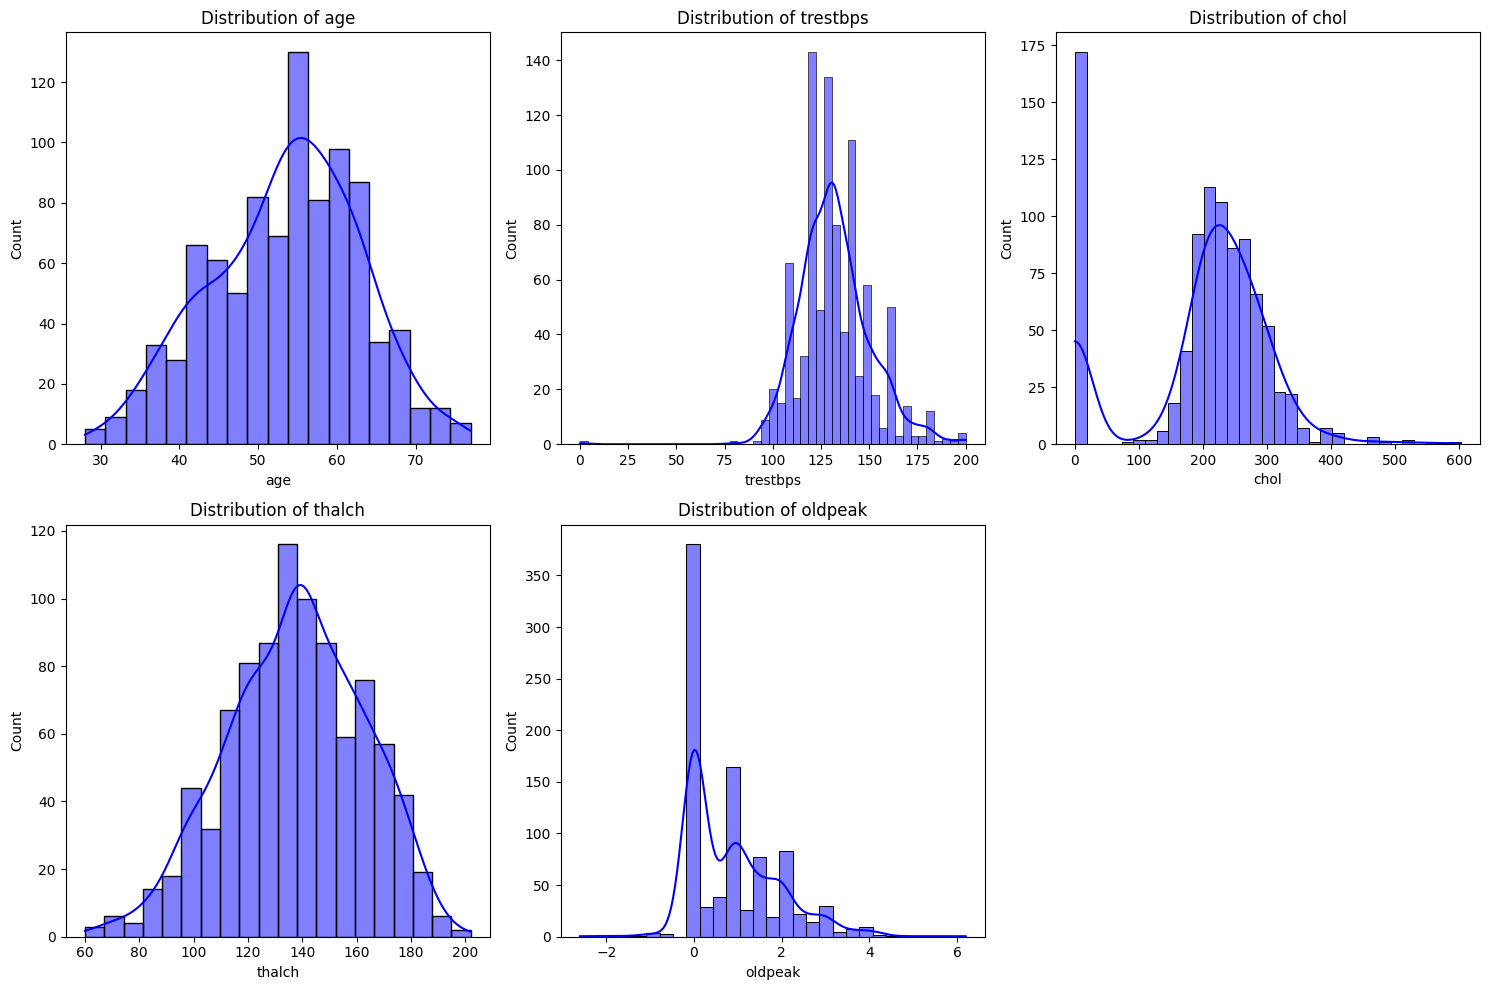

In [ ]:
important_features = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']
plt.figure(figsize=(15, 10))
for i, feature in enumerate(important_features):
    plt.subplot(2, 3, i + 1)
    sns.histplot(data_imputed[feature], kde=True, color='blue')
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

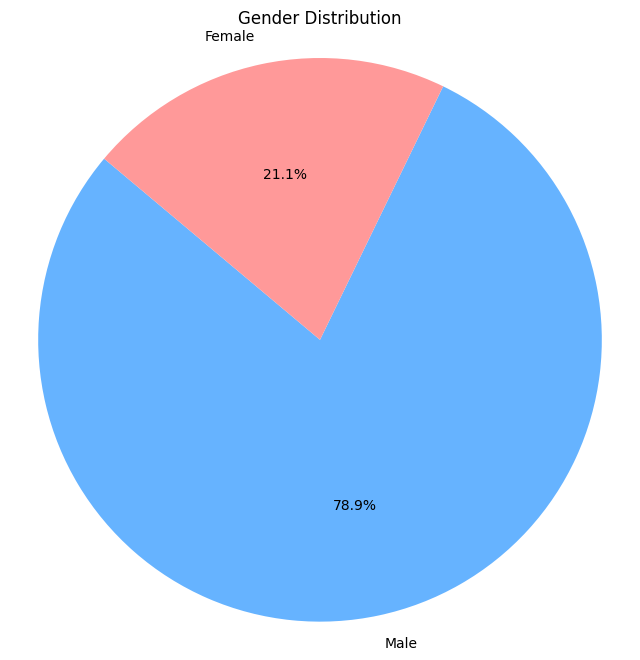

In [ ]:
gender_counts = df['sex'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['#66b3ff','#ff9999'], startangle=140)
plt.title('Gender Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
plt.show()

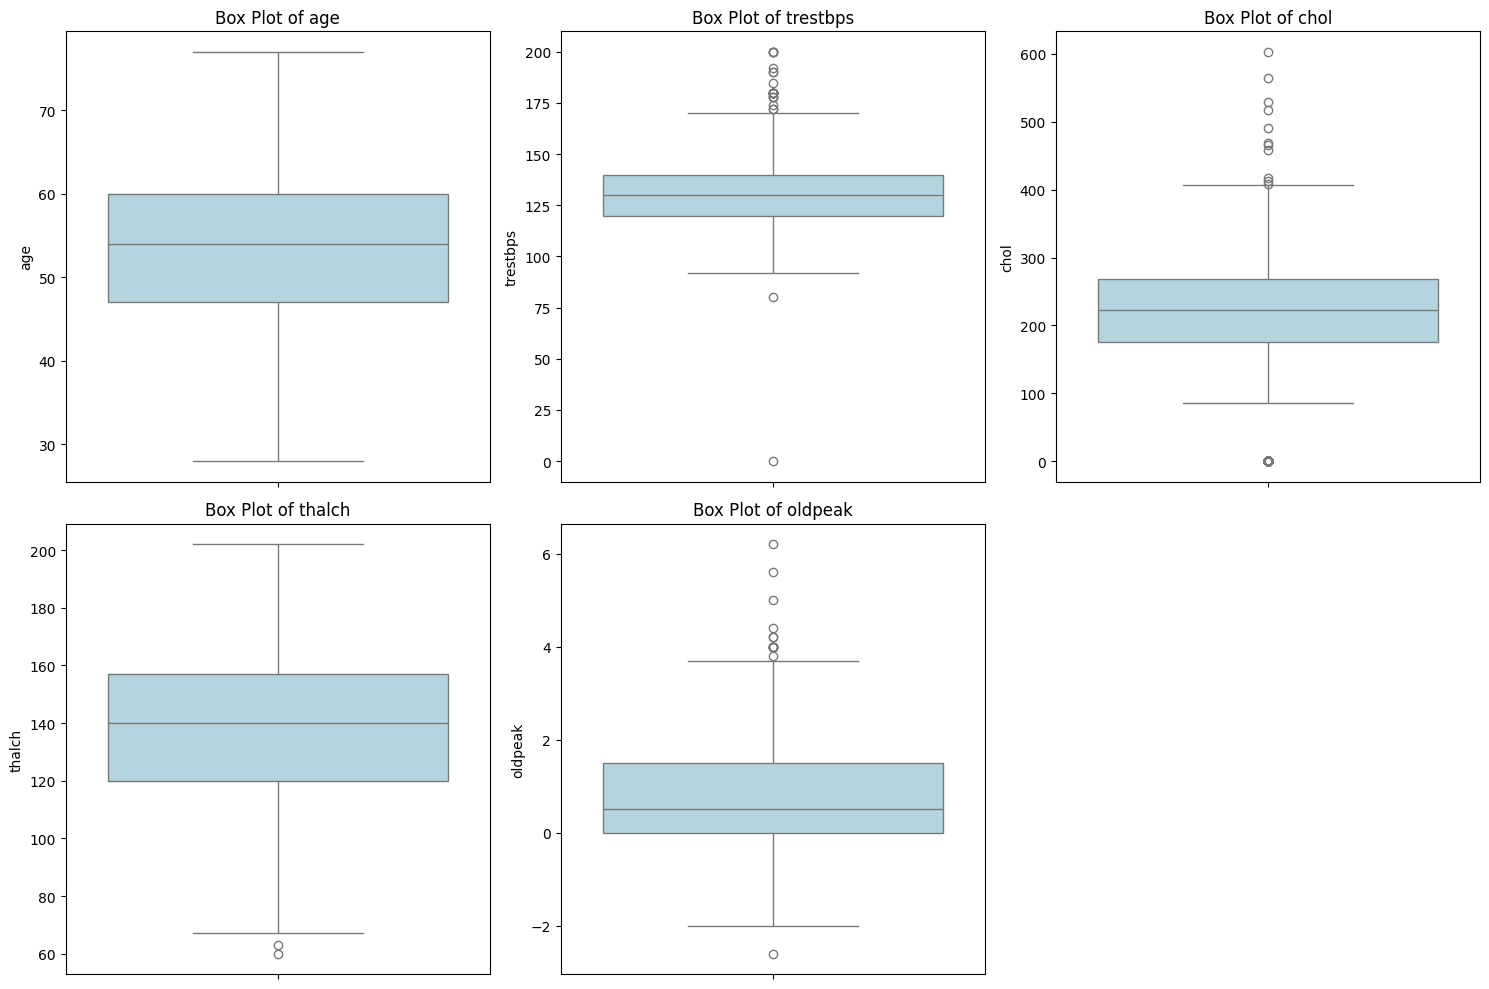

In [ ]:
important_features = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']

# Create a single figure with subplots arranged in a grid
plt.figure(figsize=(15, 10))
for i, feature in enumerate(important_features):
    plt.subplot(2, 3, i + 1)  # Create a subplot in a 2x3 grid
    sns.boxplot(y=df[feature], color='lightblue')
    plt.title(f'Box Plot of {feature}')
    plt.ylabel(feature)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


<ipython-input-35-0ab24afa6bbb>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='age', y='num', data=data_imputed, alpha=0.6, palette='viridis')


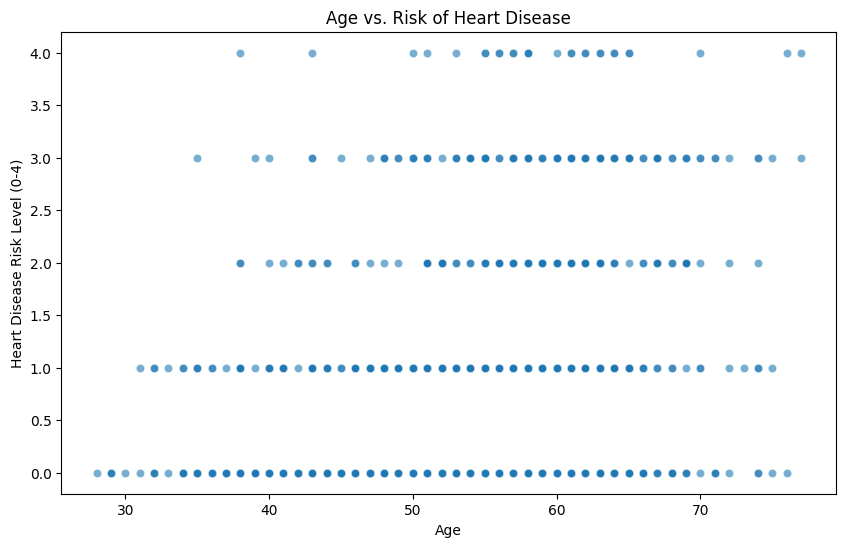

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='num', data=data_imputed, alpha=0.6, palette='viridis')
plt.title('Age vs. Risk of Heart Disease')
plt.xlabel('Age')
plt.ylabel('Heart Disease Risk Level (0-4)')
plt.show()

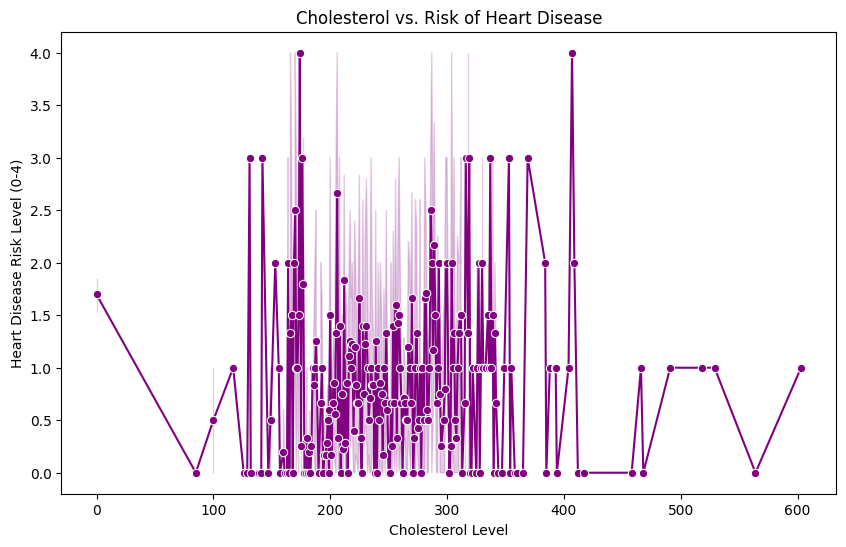

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='chol', y='num', data=data_imputed, marker='o', color='purple')
plt.title('Cholesterol vs. Risk of Heart Disease')
plt.xlabel('Cholesterol Level')
plt.ylabel('Heart Disease Risk Level (0-4)')
plt.show()

In [ ]:
# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print('Logistic Regression Report:')
print(classification_report(y_test, y_pred_lr))

Logistic Regression Report:
              precision    recall  f1-score   support

         0.0       0.58      0.83      0.68        75
         1.0       0.36      0.39      0.37        54
         2.0       0.00      0.00      0.00        25
         3.0       0.44      0.15      0.23        26
         4.0       0.00      0.00      0.00         4

    accuracy                           0.47       184
   macro avg       0.28      0.27      0.26       184
weighted avg       0.40      0.47      0.42       184



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels wit

In [ ]:
# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print('Random Forest Report:')
print(classification_report(y_test, y_pred_rf))

Random Forest Report:
              precision    recall  f1-score   support

         0.0       0.73      0.92      0.81        75
         1.0       0.55      0.57      0.56        54
         2.0       0.40      0.24      0.30        25
         3.0       0.38      0.23      0.29        26
         4.0       0.50      0.25      0.33         4

    accuracy                           0.61       184
   macro avg       0.51      0.44      0.46       184
weighted avg       0.58      0.61      0.58       184



In [ ]:
# SVM
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print('SVM Report:')
print(classification_report(y_test, y_pred_svm))

SVM Report:
              precision    recall  f1-score   support

         0.0       0.64      0.89      0.75        75
         1.0       0.46      0.69      0.55        54
         2.0       0.00      0.00      0.00        25
         3.0       0.00      0.00      0.00        26
         4.0       0.00      0.00      0.00         4

    accuracy                           0.57       184
   macro avg       0.22      0.32      0.26       184
weighted avg       0.40      0.57      0.47       184



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


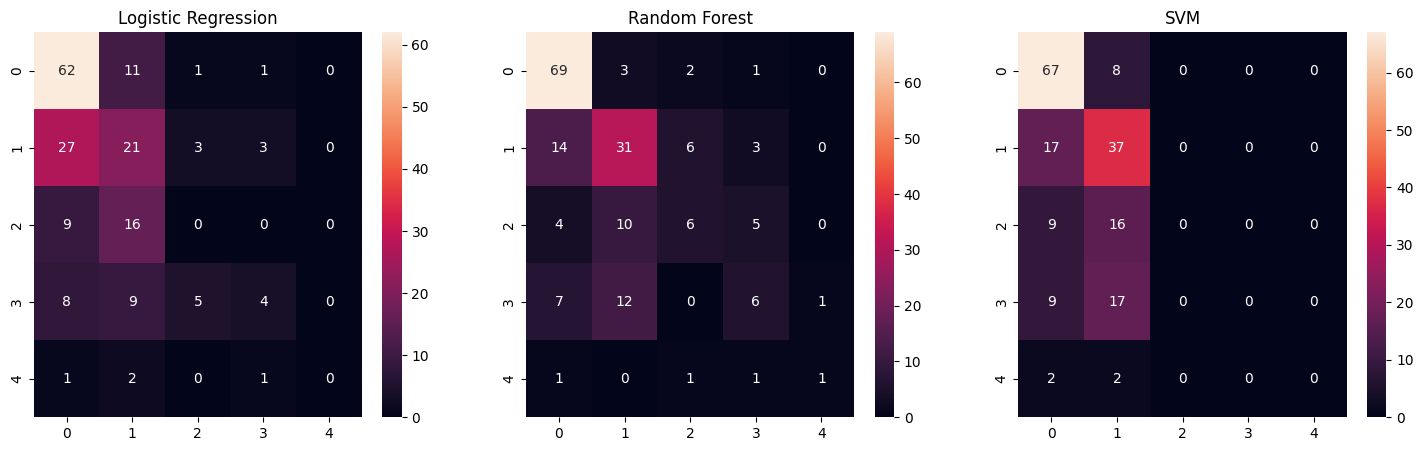

In [ ]:
# Confusion Matrix
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

# Logistic Regression
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', ax=ax[0])
ax[0].set_title('Logistic Regression')

# Random Forest
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', ax=ax[1])
ax[1].set_title('Random Forest')

# SVM
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', ax=ax[2])
ax[2].set_title('SVM')

plt.show()

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train_scaled, y_train)

y_pred_rf = rf.predict(X_test_scaled)

In [ ]:
accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf, average='weighted')
recall = recall_score(y_test, y_pred_rf, average='weighted')
f1 = f1_score(y_test, y_pred_rf, average='weighted')
roc_auc = roc_auc_score(y_test, rf.predict_proba(X_test_scaled), multi_class='ovr')

print('Validation Metrics:')
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'ROC AUC: {roc_auc:.2f}')

Validation Metrics:
Accuracy: 0.61
Precision: 0.56
Recall: 0.61
F1 Score: 0.58
ROC AUC: 0.84
